In [382]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from set_rcParams import set_rcParams
from sklearn.linear_model import LinearRegression
set_rcParams()

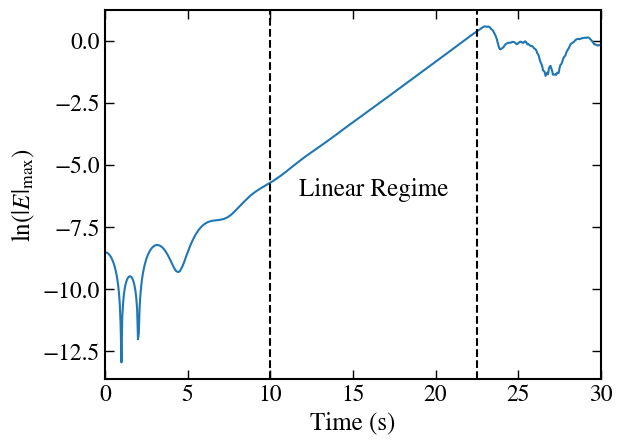

In [392]:
data = pd.read_csv("two-stream_out.csv")
start_idx = 100
stop_idx = 230
fitting_times = data['time'].to_numpy().reshape((-1, 1))

start_time = 10
stop_time = 22.5
mid_point = (start_time + stop_time) / 2
start_idx = np.where(fitting_times >= start_time)[0][0]
stop_idx = np.where(fitting_times >= stop_time)[0][0]

plt.figure()
plt.plot(data['time'][1:], np.log(data['Emax'][1:]))
plt.axvline(data['time'][start_idx], linestyle='--', c='k')
plt.axvline(data['time'][stop_idx], linestyle='--', c='k')
plt.text(mid_point, -6, 'Linear Regime',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18)
plt.xlim(left=0, right=30)
plt.ylabel('$\\ln(|E|_\\max)$')
plt.xlabel("Time (s)")
plt.show()


In [395]:
fitting_times = data['time'][start_idx:stop_idx].to_numpy().reshape((-1, 1))
fitting_data = np.log(data['Emax'][start_idx:stop_idx]).to_numpy().reshape((-1, 1))

fit = LinearRegression().fit(fitting_times,fitting_data)

analytic_omega = np.sqrt(np.abs(2 - np.sqrt(5)))
simulated_omega = fit.coef_[0][0]
error = np.abs(analytic_omega - simulated_omega) / simulated_omega

print(f"Analytic  Growth Rate: {analytic_omega:0.4f}")
print(f"Simulated Growth Rate: {simulated_omega:0.4f}")
print(f"        Percent Error: {error * 100:0.2f}%")

Analytic  Growth Rate: 0.4859
Simulated Growth Rate: 0.4882
        Percent Error: 0.48%


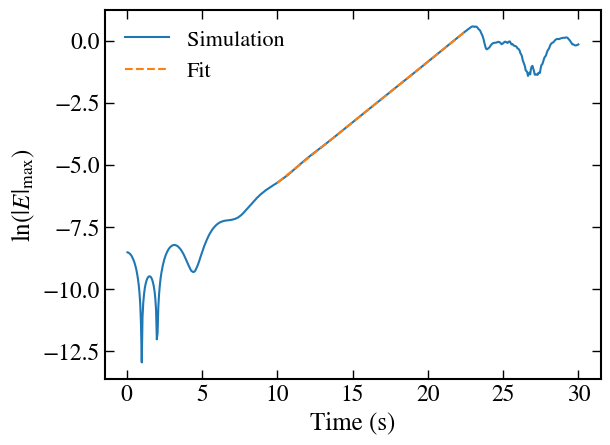

In [398]:
plt.figure()
plt.plot(data['time'][1:], np.log(data['Emax'][1:]), label='Simulation')
plt.plot(fitting_times, fit.predict(fitting_times), '--', label='Fit')
plt.ylabel('$\\ln(|E|_\\text{max})$')
plt.xlabel("Time (s)")
plt.legend()
plt.show()